In [19]:
# Multimodels exercise


In [28]:
%matplotlib inline


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score


In [22]:
WINE_DATA_PATH = "../Jupyter/wine.csv"
WINE_TEST_DATA_PATH = "../Jupyter/wineTestModel.csv"


In [23]:
# Configuration variables
N_NEIGHBORS = 3
K_FOLD = 3
#SCORING_METRICS = ["accuracy", "f1_macro"]
SCORING_METRICS = None


In [24]:
knn = "KNN"
decision_tree = "DecisionTree"
logistic_regression = "LogisticRegression"
svm = "SVM"
bayes = "Bayes"

available_models = {
    knn: KNeighborsClassifier(n_neighbors=N_NEIGHBORS),
    decision_tree: DecisionTreeClassifier(),
    logistic_regression: LogisticRegression(),
    svm: SVC(C=1.0),
    bayes: GaussianNB()
}

predictions = {}

model_scores = {}


Plotting Examples: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

fig, ax = plt.subplots()
    ax.scatter(training_labels, predicted)
    ax.plot([training_labels.min(), training_labels.max()], [training_labels.min(), training_labels.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    plt.show()


In [30]:
data = pd.read_csv(WINE_DATA_PATH, skipinitialspace=True, skip_blank_lines=True)

training_labels = data["cultivar"]

data.drop("cultivar", inplace=True, axis=1)

score_metrics = []

for model_name in available_models.keys():
    model = available_models.get(model_name)
    
    scores = cross_validate(model, data, training_labels, scoring=SCORING_METRICS, cv=K_FOLD)
    
    if not score_metrics:
        score_metrics = list(scores.keys())
    
    model_scores[model_name] = scores


/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/pyth

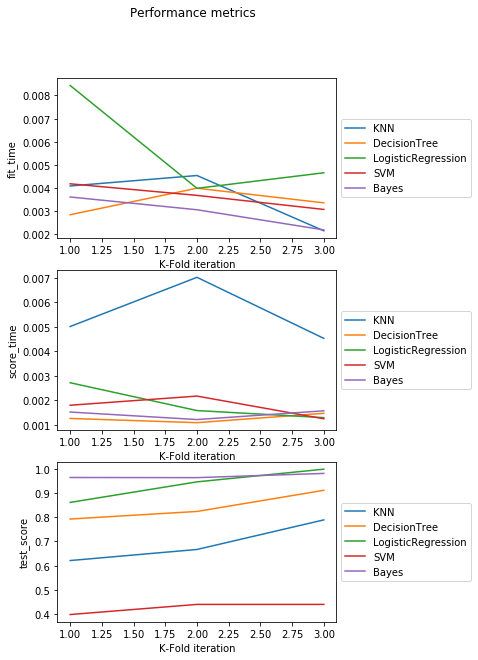

In [40]:
# Prepare the plot to stack vertical subplots
fig, axs = plt.subplots(len(score_metrics))
fig.set_figheight(10)
fig.set_figwidth(5)
fig.suptitle("Performance metrics")

# We will graph fit_time, score_time, test_score

for i in range(len(score_metrics)):
    
    current_subplot = axs[i]
    current_metric = score_metrics[i]
    
    for model_name in available_models.keys():
        
        current_subplot.set_xlabel("K-Fold iteration")
        current_subplot.set_ylabel(current_metric)
        
        current_subplot.plot(range(1, 4),
                 model_scores.get(model_name).get(current_metric),
                 label=model_name)
        
        current_subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



{'KNN': {'fit_time': array([0.00408196, 0.00453401, 0.00214028]),
  'score_time': array([0.00501704, 0.00702906, 0.00453281]),
  'test_score': array([0.62068966, 0.66666667, 0.78947368])},
 'DecisionTree': {'fit_time': array([0.00283694, 0.00398493, 0.00335097]),
  'score_time': array([0.00125813, 0.00108504, 0.00146794]),
  'test_score': array([0.79310345, 0.8245614 , 0.9122807 ])},
 'LogisticRegression': {'fit_time': array([0.00843191, 0.00397992, 0.00465202]),
  'score_time': array([0.00271821, 0.00158   , 0.00129104]),
  'test_score': array([0.86206897, 0.94736842, 1.        ])},
 'SVM': {'fit_time': array([0.00417519, 0.00367379, 0.00306582]),
  'score_time': array([0.00179791, 0.00217223, 0.00124407]),
  'test_score': array([0.39655172, 0.43859649, 0.43859649])},
 'Bayes': {'fit_time': array([0.00360489, 0.003052  , 0.0021801 ]),
  'score_time': array([0.00151992, 0.00121284, 0.00157094]),
  'test_score': array([0.96551724, 0.96491228, 0.98245614])}}